##Step 3 - Based on your selected dataset, specify an outcome variable, protected attributes, and split the dataset into training and testing sets
● Select outcome variable(s) that relates to the creditworthiness of a customer and derive a formula to score each customer based on whether they are an Excellent Credit Risk (i.e. highly likely to pay back a loan) versus Bad Credit Risk (i.e. highly likely to default on loan). Select a range of scores from 0-100 where 100 is the maximum value for Excellent Credit Risk. To compute creditworthiness, you can apply any algorithm or set of calculations on the variables that makes sense to you - you can implement your own ML algorithm (which is perfectly fine), create a mathematical formula (which is the basis of all things AI/ML) or even just close your eyes, throw a dart, and pick a single variable from the dataset.
● Select a protected class attribute – i.e. choose an attribute on which the bias can occur, basically the attribute you want to test bias for.
● Define an unprivileged group and privileged group– i.e. choose a subset of protected attribute values which are considered unprivileged versus privileged from a fairness perspective (i.e. your unprivileged group would be your historically disadvantaged group of interest).
o For example, we might select age as our protected class attribute. In this case, I may decide to choose Older (age >= 40) as the unprivileged group and Young (age < 40) as the privileged group.
o This allows us to transform our data based on binary membership in a protected group (age).
● Randomly split your original dataset into equally-size training and testing sets. How many of each (privileged versus unprivileged) members are in each set?
● Provide your results indicating your selected outcome variable/conversion formula, protected class attribute, privileged group, and privileged group.
● Example Output:
o Outcome variable: Creditworthiness derived from History of past payments and Y
o Formula used to score members creditworthiness from 0 to 100 is [Some Formula]
o Protected Class Attribute: Age
o Privileged group: Young (age < 40); Number of Members in Training Set: J; Number of Members in Testing Set: K
o Unprivileged group: Older (age >=40); Number of Members in Training Set: X; Number of Member in Testing Set: Y

In [163]:
import pandas as pd

# Read the dataset into a pandas dataframe
df = pd.read_excel('default of credit card clients.xls', header=1)


In [164]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [165]:
print(df.columns)
df

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [166]:
# Import ML and other libraries  
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import seaborn as sns; 

 
import matplotlib.pyplot as plt
import matplotlib  


In [167]:
# Copy the "default of credit card clients.xls" dataset and assign only the "default payment next month" column to a new variable named y
y = df.copy()["default payment next month"]

#Copy the "default of credit card clients.xls" dataset to X
X = df.copy()

# Drop the y (default payment next month) column from the variable X
X.drop("default payment next month", inplace=True, axis=1)   

# Use a function from the Scikit-Learn library to randomly split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [168]:
# This code segment defines a logistic regression model and creates a pipeline that scales the data and fits the logistic regression model to the data

#Import required libraries

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Create a dictionary model called "logistic regression" containing an instance of the LogisticRegressionCV class
my_model =  {"name": "logistic regression model", "clf": LogisticRegressionCV()}

# Create a pipeline using scikit-learn consisting of two steps - a StandardScaler step (to scale the data) and a model step
my_pipeline = Pipeline([('scaler', StandardScaler()),('clf', my_model["clf"])])

# Here, the pipeline is fit to the training data X_train and y_train
my_pipeline.fit(X_train, y_train)

# Calculate the accuracy of the model on the training data and assign it to a variable
accuracy_for_train =  my_pipeline.score(X_train, y_train)

# Calculate the accuracy of the model on the test data and assign it to a variable
accuracy_for_test = my_pipeline.score(X_test, y_test)

# Calculate the accuracy of the model on both training and testing data and assign it to a variable
accuracy_combined = my_pipeline.score(X, y) 

# Print the computed accuracy values
print("Value for accuracy of training", accuracy_for_train)
print("Value for accuracy of testing", accuracy_for_test)
print("Value for all accuracies", accuracy_combined)

Value for accuracy of training 0.8116444444444444
Value for accuracy of testing 0.8090666666666667
Value for all accuracies 0.811


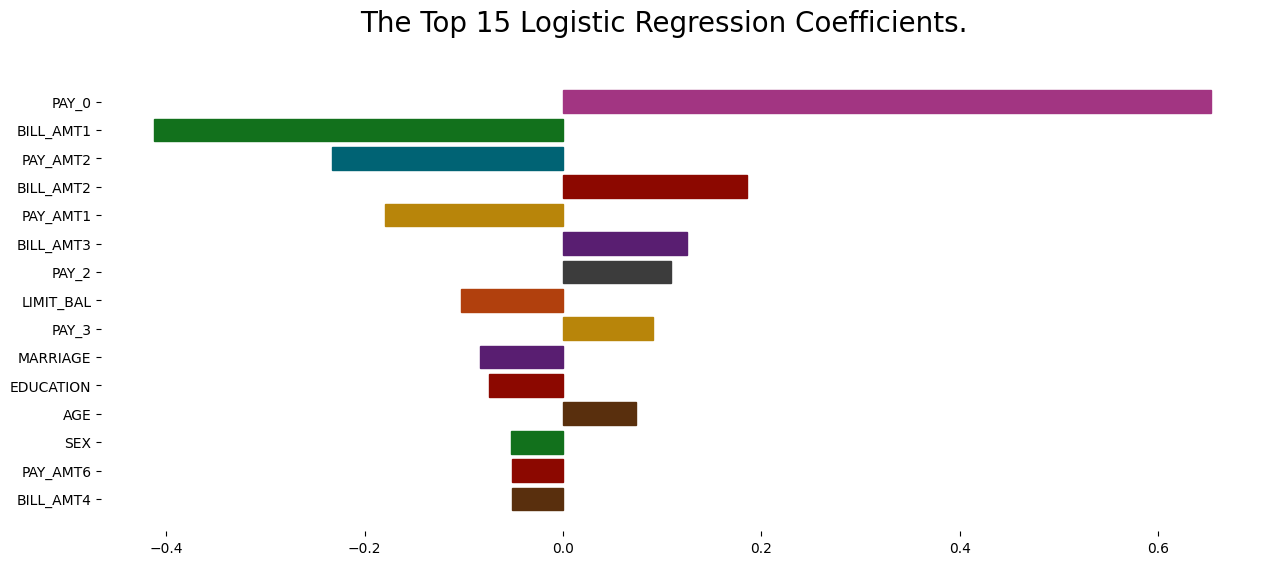

In [169]:
# Earlier defined logistic regression model object is added to the 'trained_models' list
trained_models = [my_model]

# Figure to plot the logistic regression analysis is created
plt.figure(figsize=(15,6))

# Split dataset into training and testing sets using 'train_test_split' function with an argument to set a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(df, y.values, random_state=42)

# Coefficients of the logistic regression model are extracted from the model object
coeff_logistic_regression = my_model["clf"].coef_

# Color list with a length equal to the number of columns in dataframe is created to be used to create the bar plot
my_colors =  sns.color_palette("dark", len(df.columns))

# Set number of coefficients to be displayed in the bar plot
top_coeff = 15

# Extract coefficients of logistic regression model into one-dimensional array
coeff_logistic_regression = my_model["clf"].coef_[0]

# Compute indices to sort the absolute values of the logistic regression coefficients in descending order and reverse the order
indices = np.argsort(np.abs(coeff_logistic_regression))[::-1]

# Create a horizontal bar plot using the barh function. Plot the top top_x coefficients (as determined by indices) on the y-axis, with their values on the x-axis
logistic_reg_plt = plt.barh(df.columns[indices[:top_coeff]][::-1], coeff_logistic_regression[indices[:top_coeff]][::-1])

# Iterate over each bar in the plot, setting its color to the corresponding color from the earlier created color_list array
for i,bar in enumerate(logistic_reg_plt):
  bar.set_color(my_colors[indices[:top_coeff][::-1][i]])
  plt.box(False)

# Add a title to the bar plot 
logistic_reg_top_coeff = plt.suptitle("The Top " + str(top_coeff) + " Logistic Regression" + " Coefficients.", fontsize=20, fontweight="normal")

In [170]:
# Use scikit-learn classifier method that returns the predicted probabilities to predict the probability for each instance in X.
pred_y_prob = my_pipeline.predict_proba(X)[:,1]

# Use the pipe object to make predictions on the input data X. 
pred_y = my_pipeline.predict(X)

# Slice the pred_y array to show only the first five predicted labels
pred_y[:5]

array([1, 0, 0, 0, 0])

In [171]:
# Return an array containing the predicted probabilities of the first 5 samples of y
pred_y_prob[:5]

array([0.51260453, 0.15494392, 0.20142809, 0.24787393, 0.14374432])

In [172]:
new_df = X  
#new_df["credit_score"] = pred_y_prob * 100
# Compute credit score by subtracting the predicted probability of y from 1 and multiplying by 100
# This is so as the initial y value (default payment next month) of 0 has a positive connotation and 1 has a negative connotation
new_df["credit_score"] = (1 - pred_y_prob) * 100
new_df["original_default"] = y
new_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,credit_score,original_default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,48.739547,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,84.505608,1
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,79.857191,0
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,75.212607,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,85.625568,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,84.259387,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,88.695432,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,17.245301,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,77.731859,1


## Priviledged vs Unpriviledged


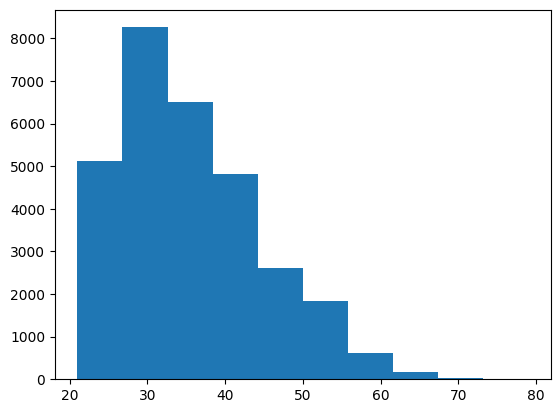

In [173]:
plt.hist(new_df["AGE"]);

In [174]:
# Create a column called "priv" and populate it with values based on a condition applied to the "AGE" column
new_df["priv"] = new_df["AGE"].apply(lambda x: 1 if x < 40 else 0 )


In [175]:
new_df["priv"].value_counts()

1    20856
0     9144
Name: priv, dtype: int64

In [176]:
# Split the new_df DataFrame into two subsets, s1 and s2, for training and testing, respectively. The training set will contain 50% of the original data
s1, s2 = train_test_split(new_df.copy(),train_size = 0.5, random_state=42) 

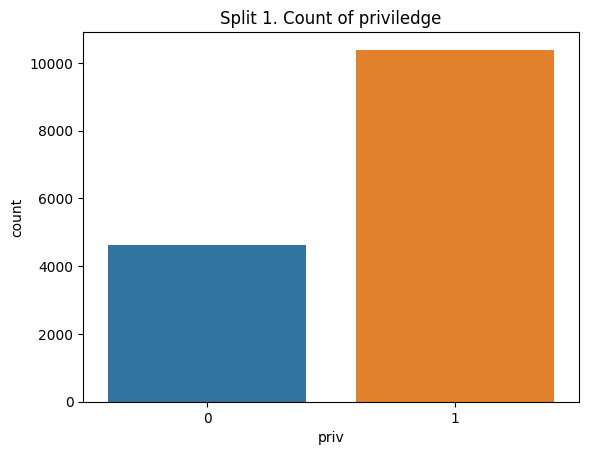

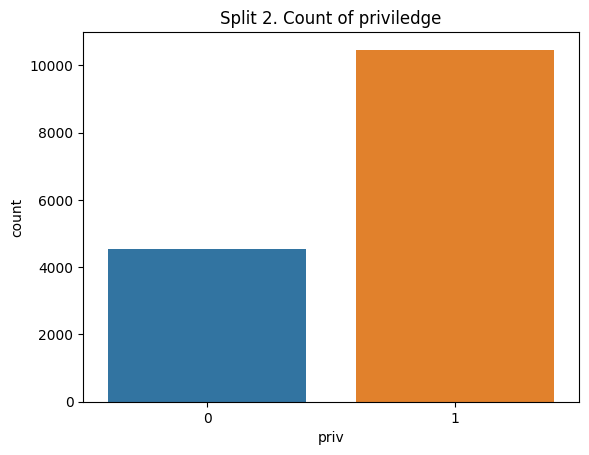

In [177]:
sns.countplot(x=s1["priv"]).set_title("Split 1. Count of priviledge");
plt.figure()
sns.countplot(x=s2["priv"]).set_title("Split 2. Count of priviledge");

In [178]:
# View the counts of the privileged and unprivileged groups in the split training dataset
s1["priv"].value_counts()

1    10389
0     4611
Name: priv, dtype: int64

In [179]:
#Determine the number of 0s and 1s in the 'priv' column in the s1 split training dataset
priv_counts = s1['priv'].value_counts()

#Extract the counts of 0s and 1s into separate variables
# The count of the number of zeros denoting the unprivileged group in the s1 split training dataset
num_zeros = priv_counts[0]

# The count of the number of ones denoting the privileged group in the s1 split training dataset
num_ones = priv_counts[1]

#Display the result of the variables counting the 0s and 1s
print("The total count in the unprivileged age category in the s1 split dataset is:", num_zeros)
print("The total count in the privileged age category in the s1 split dataset is:", num_ones)

The total count in the unprivileged age category in the s1 split dataset is: 4611
The total count in the privileged age category in the s1 split dataset is: 10389


In [180]:
# View the counts of the privileged and unprivileged groups in the split testing dataset
s2["priv"].value_counts()

1    10467
0     4533
Name: priv, dtype: int64

In [181]:
#Determine the number of 0s and 1s in the 'priv' column in the s2 split testing dataset
priv_counts2 = s2['priv'].value_counts()

#Extract the counts into separate variables
# The count of the number of zeros denoting the unprivileged group in the s2 split testing dataset
num_zeros2 = priv_counts2[0]

# The count of the number of ones denoting the privileged group in the s2 split testing dataset
num_ones2 = priv_counts2[1]

#Display the result of the variables counting the 0s and 1s
print("The total count in the unprivileged age category in the s2 split dataset is:", num_zeros2)
print("The total count in the privileged age category in the s2 split dataset is:", num_ones2)

The total count in the unprivileged age category in the s2 split dataset is: 4533
The total count in the privileged age category in the s2 split dataset is: 10467


In [182]:
from tabulate import tabulate

table = [
    ['Dataset', 'Privileged Group', 'Unprivileged Group'],
    ['Training dataset', num_ones, num_zeros],
    ['Testing dataset', num_ones2, num_zeros2]
]

# Display the privileged and unprivileged group counts in the training and testing datasets
print(tabulate(table, headers='firstrow', tablefmt='grid'))

+------------------+--------------------+----------------------+
| Dataset          |   Privileged Group |   Unprivileged Group |
+==================+====================+======================+
| Training dataset |              10389 |                 4611 |
+------------------+--------------------+----------------------+
| Testing dataset  |              10467 |                 4533 |
+------------------+--------------------+----------------------+


##Step 4 - Graph and compute a default threshold that maximizes profit
● Using a histogram, graph the data associated with Creditworthiness (where creditworthiness is on the X-axis and the number of associated customers with that creditworthiness is on the Y-axis)
● Compute a threshold for approving a loan (based on credit risk) that tries to maximize profit. Assume that a good credit risk is associated with a creditworthiness score >=X. Highlight the threshold information on the graph.
● To compute profits, assume, in this case:
o Approved Loan/Good Credit Risk = +10 Profit
o Approved Loan/Bad Credit Risk = -5 Profit
o Declined Loan/Good Credit Risk = -3 Profit
o Decline Loan/Bad Credit Risk = 0 Profit
● What is your threshold value? What is the profit based on your threshold value? Compute how many in each group (privileged and unprivileged) received Favorable (i.e. Approved) versus Unfavorable (i.e. Declined) outcomes based on your threshold value. Create a table documenting your results. Note: A Favorable outcome is associated with an Approved Loan. An Unfavorable outcome is associated with a Declined Loan.

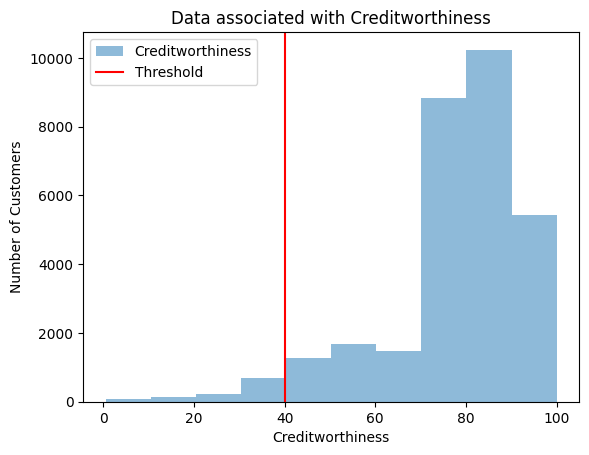

In [183]:
# STACKED HISTOGRAM AND CREDIT WORTHINESS CALCULATION FOR ENTIRE DATASET
# Create a stacked histogram showing creditworthiness scores

# Create a stacked histogram of creditworthiness data
plt.hist(new_df['credit_score'], bins=10, alpha=0.5, label='Creditworthiness')

# Set the threshold limit for approving a loan
threshold = 40

# Add a vertical line to highlight the threshold limit
#plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.axvline(x=threshold, color='red', label='Threshold')

# Add the axis labels and a title to the graph
plt.xlabel('Creditworthiness')
plt.ylabel('Number of Customers')
plt.title('Data associated with Creditworthiness')

# Add a legend to the graph
plt.legend()

# Display the plotted graph
plt.show()


In [184]:
# Loop through the training set and count the privileged and unprivileged age groups with credit score greater than 40
for i in [0, 1]:
    count = s1[(s1['priv'] == i) & (s1['credit_score'] > 40)].shape[0]
    print("Training Set: Age", i, "with Credit Score > 40:", count)

# Loop through the testing set and count the privileged and unprivileged age groups with credit score greater than 40
for i in [0, 1]:
    count = s2[(s2['priv'] == i) & (s2['credit_score'] > 40)].shape[0]
    print("Testing Set: Age", i, "with Credit Score > 40:", count)

Training Set: Age 0 with Credit Score > 40: 4371
Training Set: Age 1 with Credit Score > 40: 10093
Testing Set: Age 0 with Credit Score > 40: 4315
Testing Set: Age 1 with Credit Score > 40: 10154


In [185]:
new_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,credit_score,original_default,priv
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,48.739547,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,84.505608,1,1
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,79.857191,0,1
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,75.212607,0,1
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,85.625568,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,84.259387,0,1
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,0,1837,3526,8998,129,0,0,88.695432,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,19357,0,0,22000,4200,2000,3100,17.245301,1,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,48944,85900,3409,1178,1926,52964,1804,77.731859,1,0


In [186]:
s1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,credit_score,original_default,priv
12842,12843,80000,2,3,2,47,-2,-2,-2,-2,...,48855,5501,6150,0,0,48855,1832,96.263959,0,0
2861,2862,220000,2,1,2,35,-1,-1,-1,-1,...,500,11526,1282,0,1121,500,0,89.976628,1,1
28840,28841,300000,2,3,2,33,-1,-1,-2,-2,...,-694,0,0,0,0,0,5000,94.927460,1,1
14100,14101,80000,2,2,1,53,0,0,0,0,...,35448,1541,1556,1219,1262,1270,1314,72.927047,0,0
10723,10724,500000,2,2,2,32,0,-1,-1,-1,...,77055,3840,7527,77166,3397,4055,2266,89.560867,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,29803,50000,1,2,2,32,0,0,0,0,...,6119,2000,3000,1591,72,1134,73421,81.393500,0,1
5390,5391,200000,1,1,2,37,2,2,2,2,...,172084,13500,6000,0,7500,6000,4000,46.805256,1,1
860,861,50000,1,1,2,26,-2,-2,-2,-2,...,0,0,0,0,0,0,0,93.675271,0,1
15795,15796,70000,2,2,2,25,0,0,0,0,...,28039,3000,2000,4500,1200,0,1200,80.601675,1,1


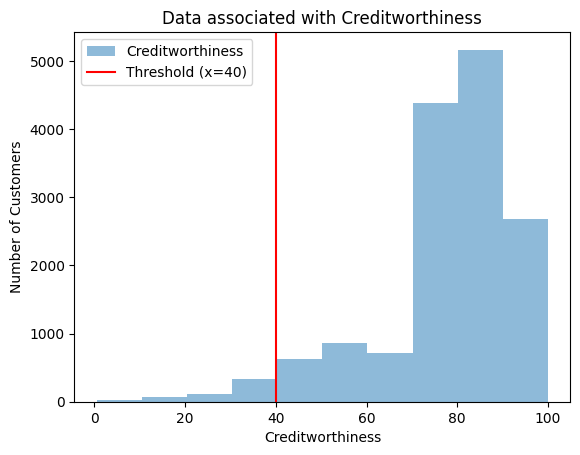

In [187]:
# STACKED HISTOGRAM AND CREDIT WORTHINESS CALCULATION FOR TRAINING DATASET
# Create a stacked histogram of creditworthiness data

# Create a stacked histogram of creditworthiness data
plt.hist(s1['credit_score'], bins=10, alpha=0.5, label='Creditworthiness')

# Set the threshold limit for approving a loan
threshold = 40

# Add a vertical line to the graph to highlight the threshold limit at X = 40
plt.axvline(x=threshold, color='red', label='Threshold (x=40)')

# Add the axis labels to the graph. Also add a title to the graph
plt.xlabel('Creditworthiness')
plt.ylabel('Number of Customers')
plt.title('Data associated with Creditworthiness')

# Add a legend to the plotted graph
plt.legend()

# Display the plotted graph
plt.show()


In [188]:
# Initialize all variables calculating the profits and the approved and denied loans for bad and good credit for the privileged and unprivileged groups to 0
Unpriv_Approved_Loan_Good_Credit_Risk = 0
unpriv_Profit_approved_good_credit = 0
Unpriv_Approved_Loan_Bad_Credit_Risk = 0
unpriv_Profit_approved_bad_credit = 0
Unpriv_Denied_Loan_Good_Credit_Risk = 0
unpriv_Profit_denied_good_credit = 0
Unpriv_Denied_Loan_Bad_Credit_Risk = 0
unpriv_Profit_denied_bad_credit = 0
Priv_Approved_Loan_Good_Credit_Risk = 0
priv_Profit_approved_good_credit = 0
Priv_Approved_Loan_Bad_Credit_Risk = 0
priv_Profit_approved_bad_credit = 0
Priv_Denied_Loan_Good_Credit_Risk = 0
priv_Profit_denied_good_credit = 0
Priv_Denied_Loan_Bad_Credit_Risk = 0
priv_Profit_denied_bad_credit = 0

# Loop through the dataframe to compute good credit risk counts, bad credit risk counts and profits for the privileged and unprivileged groups
for index, row in s1.iterrows():
    priv = row['priv']
    credit_score = row['credit_score']
    original_default = row['original_default']
    
    if priv == 0:
        if credit_score > 40 and original_default == 0:
            Unpriv_Approved_Loan_Good_Credit_Risk += 1
            unpriv_Profit_approved_good_credit += 10
        elif credit_score < 40 and original_default == 0:
            Unpriv_Approved_Loan_Bad_Credit_Risk += 1
            unpriv_Profit_approved_bad_credit -= 5
        elif credit_score > 40 and original_default == 1:
            Unpriv_Denied_Loan_Good_Credit_Risk += 1
            unpriv_Profit_denied_good_credit -= 3
        elif credit_score < 40 and original_default == 1:
            Unpriv_Denied_Loan_Bad_Credit_Risk += 1
    elif priv == 1:
        if credit_score > 40 and original_default == 0:
            Priv_Approved_Loan_Good_Credit_Risk += 1
            priv_Profit_approved_good_credit += 10
        elif credit_score < 40 and original_default == 0:
            Priv_Approved_Loan_Bad_Credit_Risk += 1
            priv_Profit_approved_bad_credit -= 5
        elif credit_score > 40 and original_default == 1:
            Priv_Denied_Loan_Good_Credit_Risk += 1
            priv_Profit_denied_good_credit -= 3
        elif credit_score < 40 and original_default == 1:
            Priv_Denied_Loan_Bad_Credit_Risk += 1

# print the variable values
print("Approved Loan/Good Credit Risk group for the unprivileged age group:", Unpriv_Approved_Loan_Good_Credit_Risk)
print("Profit for Approved Loan/Good Credit Risk group for the unprivileged age group:", unpriv_Profit_approved_good_credit)
print("Approved Loan/Bad Credit Risk group for the unprivileged age group:", Unpriv_Approved_Loan_Bad_Credit_Risk)
print("Profit for Approved Loan/Bad Credit Risk group for the unprivileged age group:", unpriv_Profit_approved_bad_credit)
print("Denied Loan/Good Credit Risk group for the unprivileged age group:", Unpriv_Denied_Loan_Good_Credit_Risk)
print("Profit for Denied Loan/Good Credit Risk group for the unprivileged age group:", unpriv_Profit_denied_good_credit)
print("Denied Loan/Bad Credit Risk group for the unprivileged age group:", Unpriv_Denied_Loan_Bad_Credit_Risk)
print("Profit for Denied Loan/Good Credit Risk group for the unprivileged age group:", unpriv_Profit_denied_bad_credit)
print("Approved Loan/Good Credit Risk group for the privileged age group:", Priv_Approved_Loan_Good_Credit_Risk)
print("Profit for Approved Loan/Good Credit Risk group for the privileged age group:", priv_Profit_approved_good_credit)
print("Approved Loan/Bad Credit Risk group for the privileged age group:", Priv_Approved_Loan_Bad_Credit_Risk)
print("Profit for Approved Loan/Bad Credit Risk group for the privileged age group:", priv_Profit_approved_bad_credit)
print("Denied Loan/Good Credit Risk group for the privileged age group:", Priv_Denied_Loan_Good_Credit_Risk)
print("Profit for Denied Loan/Good Credit Risk group for the privileged age group:", priv_Profit_denied_good_credit)
print("Denied Loan/Bad Credit Risk group for the privileged age group:", Priv_Denied_Loan_Bad_Credit_Risk)
print("Profit for Denied Loan/Good Credit Risk group for the privileged age group:", priv_Profit_denied_bad_credit)



Approved Loan/Good Credit Risk group for the unprivileged age group: 3444
Profit for Approved Loan/Good Credit Risk group for the unprivileged age group: 34440
Approved Loan/Bad Credit Risk group for the unprivileged age group: 59
Profit for Approved Loan/Bad Credit Risk group for the unprivileged age group: -295
Denied Loan/Good Credit Risk group for the unprivileged age group: 927
Profit for Denied Loan/Good Credit Risk group for the unprivileged age group: -2781
Denied Loan/Bad Credit Risk group for the unprivileged age group: 181
Profit for Denied Loan/Good Credit Risk group for the unprivileged age group: 0
Approved Loan/Good Credit Risk group for the privileged age group: 8063
Profit for Approved Loan/Good Credit Risk group for the privileged age group: 80630
Approved Loan/Bad Credit Risk group for the privileged age group: 73
Profit for Approved Loan/Bad Credit Risk group for the privileged age group: -365
Denied Loan/Good Credit Risk group for the privileged age group: 2030
Pro

In [189]:
# Total number of loan approvals under the privileged age group is the summation of the approved loans with good credit risk and approved loans with bad credit risk for privileged group
total_approved_priv = Priv_Approved_Loan_Good_Credit_Risk + Priv_Approved_Loan_Bad_Credit_Risk

# Total number of loan denials under the privileged age group is the summation of the denied loans with good credit risk and denied loans with bad credit risk for privileged group
total_denied_priv = Priv_Denied_Loan_Good_Credit_Risk + Priv_Denied_Loan_Bad_Credit_Risk

# Total number of loan approvals under the unprivileged age group is the summation of the approved loans with good credit risk and approved loans with bad credit risk for unprivileged group
total_approved_unpriv = Unpriv_Approved_Loan_Good_Credit_Risk + Unpriv_Approved_Loan_Bad_Credit_Risk

# Total number of loan denials under the unprivileged age group is the summation of the denied loans with good credit risk and denied loans with bad credit risk for unprivileged group
total_denied_unpriv = Unpriv_Denied_Loan_Good_Credit_Risk + Unpriv_Denied_Loan_Bad_Credit_Risk

total_profit_priv = priv_Profit_approved_good_credit
total_profit_unpriv = unpriv_Profit_approved_good_credit

total_losses_priv = priv_Profit_approved_bad_credit + priv_Profit_denied_good_credit + priv_Profit_denied_bad_credit
total_losses_unpriv = unpriv_Profit_approved_bad_credit + unpriv_Profit_denied_good_credit + unpriv_Profit_denied_bad_credit

total_profit = priv_Profit_approved_good_credit + unpriv_Profit_approved_good_credit

print("Total number of loan approvals under the privileged age group:", total_approved_priv)
print("Total number of loan denials under the privileged age group:", total_denied_priv)
print("Total number of loan approvals under the unprivileged age group:", total_approved_unpriv)
print("Total number of loan denials under the unprivileged age group:", total_denied_unpriv)

print("Total profit for the privileged group:", total_profit_priv)
print("Total profit for the unprivileged group:",total_profit_unpriv)

print("Total combined profit for privileged and unprivileged groups for the training dataset:", total_profit)

Total number of loan approvals under the privileged age group: 8136
Total number of loan denials under the privileged age group: 2253
Total number of loan approvals under the unprivileged age group: 3503
Total number of loan denials under the unprivileged age group: 1108
Total profit for the privileged group: 80630
Total profit for the unprivileged group: 34440
Total combined profit for privileged and unprivileged groups for the training dataset: 115070


In [190]:
from tabulate import tabulate

table = [
    ['Section', 'Favorable (Loan Approved)', 'Unfavorable (Loan Declined)'],
    ['Privileged Group', total_approved_priv, total_denied_priv],
    ['Unprivileged Group', total_approved_unpriv, total_denied_unpriv]
]

# Display the privileged and unprivileged loan approvals and denials
print(tabulate(table, headers='firstrow', tablefmt='grid'))

+--------------------+-----------------------------+-------------------------------+
| Section            |   Favorable (Loan Approved) |   Unfavorable (Loan Declined) |
+====================+=============================+===============================+
| Privileged Group   |                        8136 |                          2253 |
+--------------------+-----------------------------+-------------------------------+
| Unprivileged Group |                        3503 |                          1108 |
+--------------------+-----------------------------+-------------------------------+


##Step 5 - Compute fairness metric on your training set
● Based on your protected class attribute and defined privileged and unprivileged groups, select two different fairness metrics (as defined in either the AI Fairness 360 Toolkit or What-If Tool) and compute the differences between privileged and unprivileged groups in your training set data [Note: You can code up your own mathematical formulations, modify open-source code that wasn’t developed for this course, or use the python functions provided by the Toolkit(s) directly]
● For example, if we use Disparate Impact as our fairness metric, we would compute the ratio of the rate of favorable outcome for the unprivileged group to that of the privileged group. The ideal value of this metric is 1.0. A value < 1 implies higher benefit for the privileged group and a value >1 implies a higher benefit for the unprivileged group.
● Identify which fairness metrics were selected and provide your quantitative results from applying the two different fairness metrics on your training set data using your default threshold (Computed in Step 4). Do any of the differences indicate bias either for or against the unprivileged or privileged group? Graph the result for both fairness metrics (indicating the fair/bias thresholds) and document the results in a tabular format.

In [191]:
#Compute the disparate impact fairness metric

# Compute the rate of favorable (approved) outcome for the privileged group of Age
rate_total_approved_priv = total_approved_priv / num_ones

# Compute the rate of favorable (approved) outcome for the unprivileged group of Age
rate_total_approved_unpriv = total_approved_unpriv / num_zeros

print("The rate of total loans approved in the privileged group is: ", rate_total_approved_priv)
print("The rate of total loans approved in the unprivileged group is: ", rate_total_approved_unpriv)

# Disparate Impact fairness metric computation formula
disparate_impact = rate_total_approved_unpriv / rate_total_approved_priv

# Print the value of the disparate impact metric value
print("The disparate impact metric value is:", disparate_impact)


The rate of total loans approved in the privileged group is:  0.7831360092405428
The rate of total loans approved in the unprivileged group is:  0.7597050531338104
The disparate impact metric value is: 0.9700806043519121


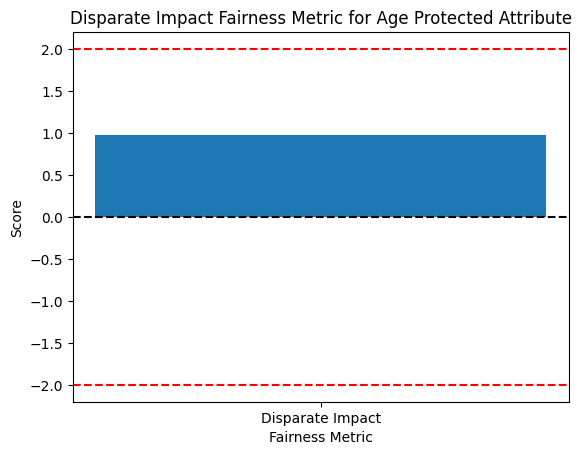

In [192]:
# Graph the Disparate Impact fairness metric
fig, ax = plt.subplots()
ax.axhline(y=0, color='k', linestyle='--')
ax.axhline(y=2.0, color='r', linestyle='--')
ax.axhline(y=-2.0, color='r', linestyle='--')
ax.set_xlabel('Fairness Metric')
ax.set_ylabel('Score')
ax.set_title('Disparate Impact Fairness Metric for Age Protected Attribute')
ax.bar('Disparate Impact', disparate_impact)
plt.show()

In [193]:
#install AI Fairness 360 toolkit
!pip install aif360

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [194]:
#Install required libraries or check for installation of required libraries
!pip install 'aif360[LawSchoolGPA]'
!pip install 'aif360[Reductions]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


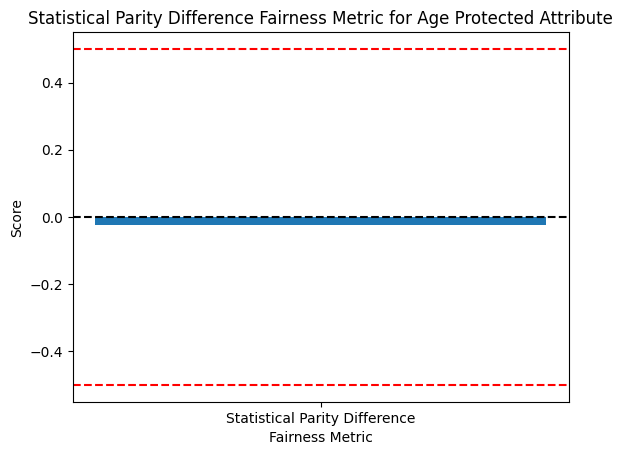

In [195]:
#Compute the statistical parity difference fairness metric

import pandas as pd
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
import matplotlib.pyplot as plt


# Create a StandardDataset object from the training set dataframe
dataset = StandardDataset(s1, 
                          label_name='original_default', 
                          favorable_classes=[0], 
                          protected_attribute_names=['priv'], 
                          privileged_classes=[[0]])

# Compute the statistical parity difference fairness metric from the StandardDataset object that was created
binary_metric = BinaryLabelDatasetMetric(dataset, 
                                          unprivileged_groups=[{"priv": 0}], 
                                          privileged_groups=[{"priv": 1}])

# Calculate the statistical parity difference fairness metric score
statistical_parity_difference = binary_metric.statistical_parity_difference()

# Graph the statistical parity difference fairness metric
fig, ax = plt.subplots()
ax.axhline(y=0, color='k', linestyle='--')
ax.axhline(y=0.5, color='r', linestyle='--')
ax.axhline(y=-0.5, color='r', linestyle='--')
ax.set_xlabel('Fairness Metric')
ax.set_ylabel('Score')
ax.set_title('Statistical Parity Difference Fairness Metric for Age Protected Attribute')
ax.bar('Statistical Parity Difference', statistical_parity_difference)
plt.show()


In [196]:
# Print the value of the statistical parity difference metric value
print("The statistical parity difference metric value is:", statistical_parity_difference)

The statistical parity difference metric value is: -0.023430956106732403


In [197]:
from tabulate import tabulate

table = [
    ['Group', 'Total', 'Favorable Outcome', 'Rate of favorable outcome'],
    ['Privileged', num_ones, total_approved_priv, rate_total_approved_priv],
    ['Unprivileged', num_zeros, total_approved_unpriv, rate_total_approved_unpriv]
]

# Display the metrics used to calculate the Disparate Impact fairness metric
print(tabulate(table, headers='firstrow', tablefmt='grid'))

+--------------+---------+---------------------+-----------------------------+
| Group        |   Total |   Favorable Outcome |   Rate of favorable outcome |
+==============+=========+=====================+=============================+
| Privileged   |   10389 |                8136 |                    0.783136 |
+--------------+---------+---------------------+-----------------------------+
| Unprivileged |    4611 |                3503 |                    0.759705 |
+--------------+---------+---------------------+-----------------------------+


In [198]:
from tabulate import tabulate

table = [
    ['Fairness Metric', 'Value', 'Leaning of Bias'],
    ['Disparate Impact', disparate_impact, 'Privileged Group (very slightly)'],
    ['Statistical Parity Difference', statistical_parity_difference, 'Privileged Group (very slightly)']
]

# Display the Disparate Impact and Statistical Parity Difference fairness metric values and the bias leanings
print(tabulate(table, headers='firstrow', tablefmt='grid'))

+-------------------------------+-----------+----------------------------------+
| Fairness Metric               |     Value | Leaning of Bias                  |
+===============================+===========+==================================+
| Disparate Impact              |  0.970081 | Privileged Group (very slightly) |
+-------------------------------+-----------+----------------------------------+
| Statistical Parity Difference | -0.023431 | Privileged Group (very slightly) |
+-------------------------------+-----------+----------------------------------+


##Step 6 – Mitigate bias in the training dataset
● We are going to try to mitigate any biases in the training dataset. For this step, either 1) define two different creditworthiness formulas for the unprivileged versus privileged groups (relating to Step 3) and/or 2) define different threshold values for approving a loan even if they are considered a bad credit risk (Recall, in Step 4, we assumed that a good credit risk is associated with a creditworthiness score >=X).
● Select from one of the two fairness metrics identified in Step 5. Find threshold values for each group that removes differences between the privileged and unprivileged group based primarily on the fairness metric selected while secondly maximizing profit as much as possible based on the profit formula in Step 4. If you found in Step 4 that there were no (or minimal) differences already, is there a different set of threshold values that provides more profits while still maintaining that minimal difference?
● Graph the histograms associated with Good Credit Risk versus Bad Credit Risk as a function of your protected class attribute and highlight your threshold information on the graph.
● What is your new creditworthiness formula (if defined differently)? What are your threshold values? What is the profit based on your threshold values? Create a table documenting how many in each group (privileged and unprivileged) received Favorable (i.e. Approved) versus Unfavorable (i.e. Declined) outcomes based on your new threshold values.

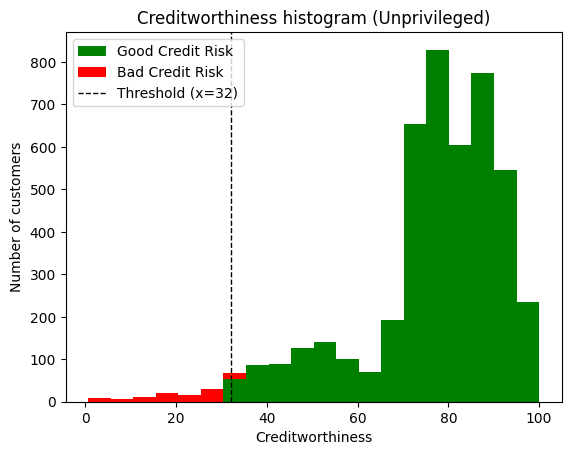

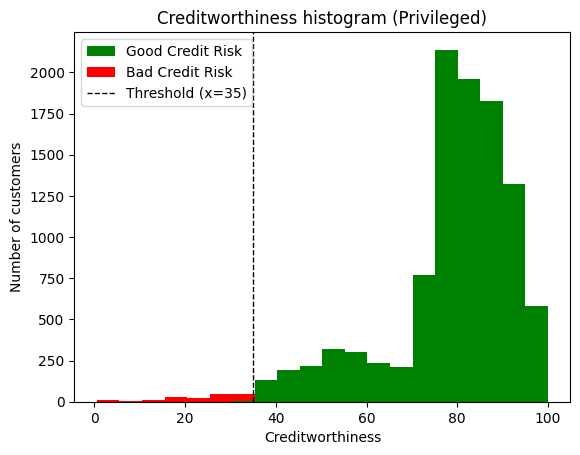

In [199]:
import pandas as pd
import matplotlib.pyplot as plt


# Create the series for creditworthiness to extract credit scores for the unprivileged group or for priv=0 at credit score threshold of 32
creditworthiness_0 = s1[s1['priv'] == 0]['credit_score']
good_credit_0 = creditworthiness_0[creditworthiness_0 >= 32]
bad_credit_0 = creditworthiness_0[creditworthiness_0 < 32]

# Create the stacked histogram showing creditworthiness scores for the unprivileged group or for priv=0
plt.hist([good_credit_0, bad_credit_0], stacked=True, bins=20, color=['green', 'red'], label=['Good Credit Risk', 'Bad Credit Risk'])
plt.axvline(x=32, color='black', linestyle='dashed', linewidth=1, label='Threshold (x=32)')
plt.xlabel('Creditworthiness')
plt.ylabel('Number of customers')
plt.title('Creditworthiness histogram (Unprivileged)')
plt.legend()
plt.show()

# Create the series for creditworthiness to extract credit scores for the privileged group or for priv=1 at credit score threshold of 35
creditworthiness_1 = s1[s1['priv'] == 1]['credit_score']
good_credit_1 = creditworthiness_1[creditworthiness_1 >= 35]
bad_credit_1 = creditworthiness_1[creditworthiness_1 < 35]

# Create the stacked histogram showing creditworthiness scores for the privileged group or for priv=1
plt.hist([good_credit_1, bad_credit_1], stacked=True, bins=20, color=['green', 'red'], label=['Good Credit Risk', 'Bad Credit Risk'])
plt.axvline(x=35, color='black', linestyle='dashed', linewidth=1, label='Threshold (x=35)')
plt.xlabel('Creditworthiness')
plt.ylabel('Number of customers')
plt.title('Creditworthiness histogram (Privileged)')
plt.legend()
plt.show()


In [200]:
creditworthiness_0

12842    96.263959
14100    72.927047
5903     70.962736
8063     65.303916
21283    76.545054
           ...    
19769    83.906273
5311     70.310139
1685     92.753752
27495    84.468438
11964    81.054042
Name: credit_score, Length: 4611, dtype: float64

In [201]:
# Create two columns called "priv1" and "priv2" and populate it with values based on a condition applied to the "AGE" column
# The 'priv1' column is based on the threshold of 32 for the unprivileged subgroup
s1["priv1"] = s1["AGE"].apply(lambda x: 1 if x < 32 else 0 )

# The 'priv2' column is based on the threshold of 35 for the privileged subgroup
s1["priv2"] = s1["AGE"].apply(lambda x: 1 if x < 35 else 0 )

In [202]:
s1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,credit_score,original_default,priv,priv1,priv2
12842,12843,80000,2,3,2,47,-2,-2,-2,-2,...,6150,0,0,48855,1832,96.263959,0,0,0,0
2861,2862,220000,2,1,2,35,-1,-1,-1,-1,...,1282,0,1121,500,0,89.976628,1,1,0,0
28840,28841,300000,2,3,2,33,-1,-1,-2,-2,...,0,0,0,0,5000,94.927460,1,1,0,1
14100,14101,80000,2,2,1,53,0,0,0,0,...,1556,1219,1262,1270,1314,72.927047,0,0,0,0
10723,10724,500000,2,2,2,32,0,-1,-1,-1,...,7527,77166,3397,4055,2266,89.560867,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,29803,50000,1,2,2,32,0,0,0,0,...,3000,1591,72,1134,73421,81.393500,0,1,0,1
5390,5391,200000,1,1,2,37,2,2,2,2,...,6000,0,7500,6000,4000,46.805256,1,1,0,0
860,861,50000,1,1,2,26,-2,-2,-2,-2,...,0,0,0,0,0,93.675271,0,1,1,1
15795,15796,70000,2,2,2,25,0,0,0,0,...,2000,4500,1200,0,1200,80.601675,1,1,1,1


In [203]:
#Determine the number of 0s and 1s in the 'priv1' column in the s1 split dataset for the unprivileged subgroup (threshold value of 32)
priv_counts3 = s1['priv1'].value_counts()

#Extract the counts into separate variables
num_zeros3 = priv_counts3[0]
num_ones3 = priv_counts3[1]

#Display the result of the variables counting the 0s and 1s
print("The total count in the unprivileged age category in the s1 split dataset is:", num_zeros3)
print("The total count in the privileged age category in the s1 split dataset is:", num_ones3)

The total count in the unprivileged age category in the s1 split dataset is: 8888
The total count in the privileged age category in the s1 split dataset is: 6112


In [204]:
#Determine the number of 0s and 1s in the 'priv2' column in the s1 split dataset for the privileged subgroup (threshold value of 35)
priv_counts4 = s1['priv2'].value_counts()

#Extract the counts into separate variables
num_zeros4 = priv_counts4[0]
num_ones4 = priv_counts4[1]


#Display the result of the variables counting the 0s and 1s
print("The total count in the unprivileged age category in the s1 split dataset is:", num_zeros4)
print("The total count in the privileged age category in the s1 split dataset is:", num_ones4)

The total count in the unprivileged age category in the s1 split dataset is: 7141
The total count in the privileged age category in the s1 split dataset is: 7859


In [205]:
# Initialize all variables calculating approved and denied loans for bad and good credit for the unprivileged subgroup to 0
#using priv1 column (for threshold value of 32)
Unpriv_Approved_Loan_Good_Credit_Risk_priv0 = 0
unpriv_Profit_approved_good_credit_priv0 = 0
Unpriv_Approved_Loan_Bad_Credit_Risk_priv0 = 0
unpriv_Profit_approved_bad_credit_priv0 = 0
Unpriv_Denied_Loan_Good_Credit_Risk_priv0 = 0
unpriv_Profit_denied_good_credit_priv0 = 0
Unpriv_Denied_Loan_Bad_Credit_Risk_priv0 = 0
unpriv_Profit_denied_bad_credit_priv0 = 0
Priv_Approved_Loan_Good_Credit_Risk_priv1 = 0
priv_Profit_approved_good_credit_priv1 = 0
Priv_Approved_Loan_Bad_Credit_Risk_priv1 = 0
priv_Profit_approved_bad_credit_priv1 = 0
Priv_Denied_Loan_Good_Credit_Risk_priv1 = 0
priv_Profit_denied_good_credit_priv1 = 0
Priv_Denied_Loan_Bad_Credit_Risk_priv1 = 0
priv_Profit_denied_bad_credit_priv1 = 0

# Loop through the dataframe and compute the approved and denied good and bad credit risks for
# Creditworthiness (credit score)threshold values of 32 for the unprivileged group
for index, row in s1.iterrows():
    priv1 = row['priv1']
    credit_score = row['credit_score']
    original_default = row['original_default']
    
    if priv1 == 0:
        if credit_score > 32 and original_default == 0:
            Unpriv_Approved_Loan_Good_Credit_Risk_priv0 += 1
            unpriv_Profit_approved_good_credit_priv0 += 10
        elif credit_score < 32 and original_default == 0:
            Unpriv_Approved_Loan_Bad_Credit_Risk_priv0 += 1
            unpriv_Profit_approved_bad_credit_priv0 -= 5
        elif credit_score > 32 and original_default == 1:
            Unpriv_Denied_Loan_Good_Credit_Risk_priv0 += 1
            unpriv_Profit_denied_good_credit_priv0 -= 3
        elif credit_score < 32 and original_default == 1:
            Unpriv_Denied_Loan_Bad_Credit_Risk_priv0 += 1
    elif priv1 == 1:
        if credit_score > 32 and original_default == 0:
            Priv_Approved_Loan_Good_Credit_Risk_priv1 += 1
            priv_Profit_approved_good_credit_priv1 += 10
        elif credit_score < 32 and original_default == 0:
            Priv_Approved_Loan_Bad_Credit_Risk_priv1 += 1
            priv_Profit_approved_bad_credit_priv1 -= 5
        elif credit_score > 32 and original_default == 1:
            Priv_Denied_Loan_Good_Credit_Risk_priv1 += 1
            priv_Profit_denied_good_credit_priv1 -= 3
        elif credit_score < 32 and original_default == 1:
            Priv_Denied_Loan_Bad_Credit_Risk_priv1 += 1

# print the variable values
print("Approved Loan/Good Credit Risk group for the unprivileged age group:", Unpriv_Approved_Loan_Good_Credit_Risk_priv0)
print("Profit for Approved Loan/Good Credit Risk group for the unprivileged age group:", unpriv_Profit_approved_good_credit_priv0)
print("Approved Loan/Bad Credit Risk group for the unprivileged age group:", Unpriv_Approved_Loan_Bad_Credit_Risk_priv0)
print("Profit for Approved Loan/Bad Credit Risk group for the unprivileged age group:", unpriv_Profit_approved_bad_credit_priv0)
print("Denied Loan/Good Credit Risk group for the unprivileged age group:", Unpriv_Denied_Loan_Good_Credit_Risk_priv0)
print("Profit for Denied Loan/Good Credit Risk group for the unprivileged age group:", unpriv_Profit_denied_good_credit_priv0)
print("Denied Loan/Bad Credit Risk group for the unprivileged age group:", Unpriv_Denied_Loan_Bad_Credit_Risk_priv0)
print("Profit for Denied Loan/Good Credit Risk group for the unprivileged age group:", unpriv_Profit_denied_bad_credit_priv0)
print("Approved Loan/Good Credit Risk group for the privileged age group:", Priv_Approved_Loan_Good_Credit_Risk_priv1)
print("Profit for Approved Loan/Good Credit Risk group for the privileged age group:", priv_Profit_approved_good_credit_priv1)
print("Approved Loan/Bad Credit Risk group for the privileged age group:", Priv_Approved_Loan_Bad_Credit_Risk_priv1)
print("Profit for Approved Loan/Bad Credit Risk group for the privileged age group:", priv_Profit_approved_bad_credit_priv1)
print("Denied Loan/Good Credit Risk group for the privileged age group:", Priv_Denied_Loan_Good_Credit_Risk_priv1)
print("Profit for Denied Loan/Good Credit Risk group for the privileged age group:", priv_Profit_denied_good_credit_priv1)
print("Denied Loan/Bad Credit Risk group for the privileged age group:", Priv_Denied_Loan_Bad_Credit_Risk_priv1)
print("Profit for Denied Loan/Good Credit Risk group for the privileged age group:", priv_Profit_denied_bad_credit_priv1)

Approved Loan/Good Credit Risk group for the unprivileged age group: 6844
Profit for Approved Loan/Good Credit Risk group for the unprivileged age group: 68440
Approved Loan/Bad Credit Risk group for the unprivileged age group: 46
Profit for Approved Loan/Bad Credit Risk group for the unprivileged age group: -230
Denied Loan/Good Credit Risk group for the unprivileged age group: 1885
Profit for Denied Loan/Good Credit Risk group for the unprivileged age group: -5655
Denied Loan/Bad Credit Risk group for the unprivileged age group: 113
Profit for Denied Loan/Good Credit Risk group for the unprivileged age group: 0
Approved Loan/Good Credit Risk group for the privileged age group: 4737
Profit for Approved Loan/Good Credit Risk group for the privileged age group: 47370
Approved Loan/Bad Credit Risk group for the privileged age group: 12
Profit for Approved Loan/Bad Credit Risk group for the privileged age group: -60
Denied Loan/Good Credit Risk group for the privileged age group: 1289
Pro

In [206]:
total_approved_priv1 = Priv_Approved_Loan_Good_Credit_Risk_priv1 + Priv_Approved_Loan_Bad_Credit_Risk_priv1
total_denied_priv1 = Priv_Denied_Loan_Good_Credit_Risk_priv1 + Priv_Denied_Loan_Bad_Credit_Risk_priv1
total_approved_priv0 = Unpriv_Approved_Loan_Good_Credit_Risk_priv0 + Unpriv_Approved_Loan_Bad_Credit_Risk_priv0
total_denied_priv0 = Unpriv_Denied_Loan_Good_Credit_Risk_priv0 + Unpriv_Denied_Loan_Bad_Credit_Risk_priv0

total_profit_priv1 = priv_Profit_approved_good_credit_priv1
total_profit_priv0 = unpriv_Profit_approved_good_credit_priv0

total_losses_priv1 = priv_Profit_approved_bad_credit_priv1 + priv_Profit_denied_good_credit_priv1 + priv_Profit_denied_bad_credit_priv1
total_losses_priv0 = unpriv_Profit_approved_bad_credit_priv0 + unpriv_Profit_denied_good_credit_priv0 + unpriv_Profit_denied_bad_credit_priv0

total_profit2 = priv_Profit_approved_good_credit_priv1 + unpriv_Profit_approved_good_credit_priv0

print("Total number of loan approvals under the privileged age group:", total_approved_priv1)
print("Total number of loan denials under the privileged age group:", total_denied_priv1)
print("Total number of loan approvals under the unprivileged age group:", total_approved_priv0)
print("Total number of loan denials under the unprivileged age group:", total_denied_priv0)

print("Total profit for the privileged group:", total_profit_priv1)
print("Total profit for the unprivileged group:",total_profit_priv0)

print("Total combined profit for privileged and unprivileged groups for the training dataset:", total_profit2)

Total number of loan approvals under the privileged age group: 4749
Total number of loan denials under the privileged age group: 1363
Total number of loan approvals under the unprivileged age group: 6890
Total number of loan denials under the unprivileged age group: 1998
Total profit for the privileged group: 47370
Total profit for the unprivileged group: 68440
Total combined profit for privileged and unprivileged groups for the training dataset: 115810


In [207]:
#Compute the disparate impact fairness metric for the unprivileged subgroup (with threshold value of 32)

rate_total_approved_priv1 = total_approved_priv1 / num_ones3
rate_total_approved_priv0 = total_approved_priv0 / num_zeros3

print("The rate of total loans approved in the privileged group is: ", rate_total_approved_priv1)
print("The rate of total loans approved in the unprivileged group is: ", rate_total_approved_priv0)

disparate_impact2 = rate_total_approved_priv0 / rate_total_approved_priv1

print("The disparate impact metric value is:", disparate_impact2)


The rate of total loans approved in the privileged group is:  0.7769960732984293
The rate of total loans approved in the unprivileged group is:  0.7752025202520252
The disparate impact metric value is: 0.9976916832555017


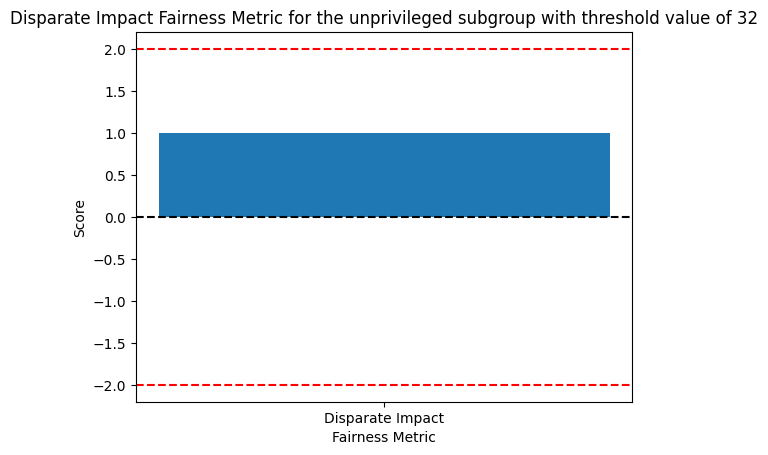

In [208]:
# Graph the Disparate Impact fairness metric for the unprivileged subgroup with threshold value of 32
fig, ax = plt.subplots()
ax.axhline(y=0, color='k', linestyle='--')
ax.axhline(y=2.0, color='r', linestyle='--')
ax.axhline(y=-2.0, color='r', linestyle='--')
ax.set_xlabel('Fairness Metric')
ax.set_ylabel('Score')
ax.set_title('Disparate Impact Fairness Metric for the unprivileged subgroup with threshold value of 32')
ax.bar('Disparate Impact', disparate_impact2)
plt.show()

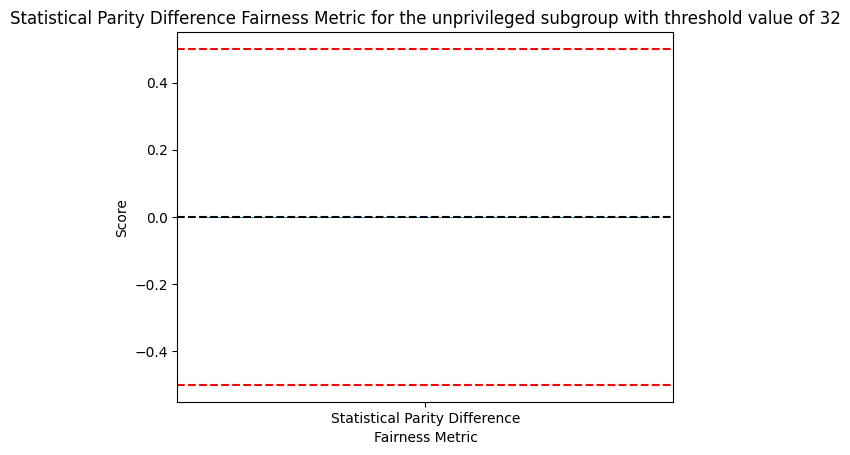

In [209]:
#Compute the statistical parity difference fairness metric for the unprivileged subgroup (with threshold value of 32)

import pandas as pd
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
import matplotlib.pyplot as plt


# Create a StandardDataset object from the training set dataframe
dataset2 = StandardDataset(s1, 
                          label_name='original_default', 
                          favorable_classes=[0], 
                          protected_attribute_names=['priv1'], 
                          privileged_classes=[[0]])

# Compute the statistical parity difference fairness metric from the StandardDataset object that was created
binary_metric2 = BinaryLabelDatasetMetric(dataset2, 
                                          unprivileged_groups=[{"priv1": 0}], 
                                          privileged_groups=[{"priv1": 1}])

# Calculate the statistical parity difference fairness metric score
statistical_parity_difference2 = binary_metric2.statistical_parity_difference()

# Graph the statistical parity difference fairness metric
fig, ax = plt.subplots()
ax.axhline(y=0, color='k', linestyle='--')
ax.axhline(y=0.5, color='r', linestyle='--')
ax.axhline(y=-0.5, color='r', linestyle='--')
ax.set_xlabel('Fairness Metric')
ax.set_ylabel('Score')
ax.set_title('Statistical Parity Difference Fairness Metric for the unprivileged subgroup with threshold value of 32')
ax.bar('Statistical Parity Difference', statistical_parity_difference2)
plt.show()


In [210]:
# Print the value of the statistical parity difference fairness metric for the unprivileged subgroup (with threshold value of 32)
print("The statistical parity difference metric value is:", statistical_parity_difference2)

The statistical parity difference metric value is: -0.0017935530464041616


In [211]:
# Initialize all variables calculating approved and denied loans for bad and good credit for the privileged subgroup to 0
#using priv2 column (for threshold value of 35)
Unpriv_Approved_Loan_Good_Credit_Risk_priv0_1 = 0
unpriv_Profit_approved_good_credit_priv0_1 = 0
Unpriv_Approved_Loan_Bad_Credit_Risk_priv0_1 = 0
unpriv_Profit_approved_bad_credit_priv0_1 = 0
Unpriv_Denied_Loan_Good_Credit_Risk_priv0_1 = 0
unpriv_Profit_denied_good_credit_priv0_1 = 0
Unpriv_Denied_Loan_Bad_Credit_Risk_priv0_1 = 0
unpriv_Profit_denied_bad_credit_priv0_1 = 0
Priv_Approved_Loan_Good_Credit_Risk_priv1_1 = 0
priv_Profit_approved_good_credit_priv1_1 = 0
Priv_Approved_Loan_Bad_Credit_Risk_priv1_1 = 0
priv_Profit_approved_bad_credit_priv1_1 = 0
Priv_Denied_Loan_Good_Credit_Risk_priv1_1 = 0
priv_Profit_denied_good_credit_priv1_1 = 0
Priv_Denied_Loan_Bad_Credit_Risk_priv1_1 = 0
priv_Profit_denied_bad_credit_priv1_1 = 0

# Loop through the dataframe
for index, row in s1.iterrows():
    priv2 = row['priv2']
    credit_score = row['credit_score']
    original_default = row['original_default']
    
    if priv2 == 0:
        if credit_score > 35 and original_default == 0:
            Unpriv_Approved_Loan_Good_Credit_Risk_priv0_1 += 1
            unpriv_Profit_approved_good_credit_priv0_1 += 10
        elif credit_score < 35 and original_default == 0:
            Unpriv_Approved_Loan_Bad_Credit_Risk_priv0_1 += 1
            unpriv_Profit_approved_bad_credit_priv0_1 -= 5
        elif credit_score > 35 and original_default == 1:
            Unpriv_Denied_Loan_Good_Credit_Risk_priv0_1 += 1
            unpriv_Profit_denied_good_credit_priv0_1 -= 3
        elif credit_score < 35 and original_default == 1:
            Unpriv_Denied_Loan_Bad_Credit_Risk_priv0_1 += 1
    elif priv2 == 1:
        if credit_score > 35 and original_default == 0:
            Priv_Approved_Loan_Good_Credit_Risk_priv1_1 += 1
            priv_Profit_approved_good_credit_priv1_1 += 10
        elif credit_score < 35 and original_default == 0:
            Priv_Approved_Loan_Bad_Credit_Risk_priv1_1 += 1
            priv_Profit_approved_bad_credit_priv1_1 -= 5
        elif credit_score > 35 and original_default == 1:
            Priv_Denied_Loan_Good_Credit_Risk_priv1_1 += 1
            priv_Profit_denied_good_credit_priv1_1 -= 3
        elif credit_score < 35 and original_default == 1:
            Priv_Denied_Loan_Bad_Credit_Risk_priv1_1 += 1

# print the variable values
print("Approved Loan/Good Credit Risk group for the unprivileged age group:", Unpriv_Approved_Loan_Good_Credit_Risk_priv0_1)
print("Profit for Approved Loan/Good Credit Risk group for the unprivileged age group:", unpriv_Profit_approved_good_credit_priv0_1)
print("Approved Loan/Bad Credit Risk group for the unprivileged age group:", Unpriv_Approved_Loan_Bad_Credit_Risk_priv0_1)
print("Profit for Approved Loan/Bad Credit Risk group for the unprivileged age group:", unpriv_Profit_approved_bad_credit_priv0_1)
print("Denied Loan/Good Credit Risk group for the unprivileged age group:", Unpriv_Denied_Loan_Good_Credit_Risk_priv0_1)
print("Profit for Denied Loan/Good Credit Risk group for the unprivileged age group:", unpriv_Profit_denied_good_credit_priv0_1)
print("Denied Loan/Bad Credit Risk group for the unprivileged age group:", Unpriv_Denied_Loan_Bad_Credit_Risk_priv0_1)
print("Profit for Denied Loan/Good Credit Risk group for the unprivileged age group:", unpriv_Profit_denied_bad_credit_priv0_1)
print("Approved Loan/Good Credit Risk group for the privileged age group:", Priv_Approved_Loan_Good_Credit_Risk_priv1_1)
print("Profit for Approved Loan/Good Credit Risk group for the privileged age group:", priv_Profit_approved_good_credit_priv1_1)
print("Approved Loan/Bad Credit Risk group for the privileged age group:", Priv_Approved_Loan_Bad_Credit_Risk_priv1_1)
print("Profit for Approved Loan/Bad Credit Risk group for the privileged age group:", priv_Profit_approved_bad_credit_priv1_1)
print("Denied Loan/Good Credit Risk group for the privileged age group:", Priv_Denied_Loan_Good_Credit_Risk_priv1_1)
print("Profit for Denied Loan/Good Credit Risk group for the privileged age group:", priv_Profit_denied_good_credit_priv1_1)
print("Denied Loan/Bad Credit Risk group for the privileged age group:", Priv_Denied_Loan_Bad_Credit_Risk_priv1_1)
print("Profit for Denied Loan/Good Credit Risk group for the privileged age group:", priv_Profit_denied_bad_credit_priv1_1)

Approved Loan/Good Credit Risk group for the unprivileged age group: 5427
Profit for Approved Loan/Good Credit Risk group for the unprivileged age group: 54270
Approved Loan/Bad Credit Risk group for the unprivileged age group: 56
Profit for Approved Loan/Bad Credit Risk group for the unprivileged age group: -280
Denied Loan/Good Credit Risk group for the unprivileged age group: 1511
Profit for Denied Loan/Good Credit Risk group for the unprivileged age group: -4533
Denied Loan/Bad Credit Risk group for the unprivileged age group: 147
Profit for Denied Loan/Good Credit Risk group for the unprivileged age group: 0
Approved Loan/Good Credit Risk group for the privileged age group: 6133
Profit for Approved Loan/Good Credit Risk group for the privileged age group: 61330
Approved Loan/Bad Credit Risk group for the privileged age group: 23
Profit for Approved Loan/Bad Credit Risk group for the privileged age group: -115
Denied Loan/Good Credit Risk group for the privileged age group: 1606
Pr

In [212]:
total_approved_priv1_1 = Priv_Approved_Loan_Good_Credit_Risk_priv1_1 + Priv_Approved_Loan_Bad_Credit_Risk_priv1_1
total_denied_priv1_1 = Priv_Denied_Loan_Good_Credit_Risk_priv1_1 + Priv_Denied_Loan_Bad_Credit_Risk_priv1_1
total_approved_priv0_1 = Unpriv_Approved_Loan_Good_Credit_Risk_priv0_1 + Unpriv_Approved_Loan_Bad_Credit_Risk_priv0_1
total_denied_priv0_1 = Unpriv_Denied_Loan_Good_Credit_Risk_priv0_1 + Unpriv_Denied_Loan_Bad_Credit_Risk_priv0_1

total_profit_priv1_1 = priv_Profit_approved_good_credit_priv1_1
total_profit_priv0_1 = unpriv_Profit_approved_good_credit_priv0_1

total_losses_priv1_1 = priv_Profit_approved_bad_credit_priv1_1 + priv_Profit_denied_good_credit_priv1_1 + priv_Profit_denied_bad_credit_priv1_1
total_losses_priv0_1 = unpriv_Profit_approved_bad_credit_priv0_1 + unpriv_Profit_denied_good_credit_priv0_1 + unpriv_Profit_denied_bad_credit_priv0_1

total_profit2_1 = priv_Profit_approved_good_credit_priv1_1 + unpriv_Profit_approved_good_credit_priv0_1

print("Total number of loan approvals under the privileged age group:", total_approved_priv1_1)
print("Total number of loan denials under the privileged age group:", total_denied_priv1_1)
print("Total number of loan approvals under the unprivileged age group:", total_approved_priv0_1)
print("Total number of loan denials under the unprivileged age group:", total_denied_priv0_1)

print("Total profit for the privileged group:", total_profit_priv1_1)
print("Total profit for the unprivileged group:",total_profit_priv0_1)

print("Total combined profit for privileged and unprivileged groups for the training dataset:", total_profit2_1)

Total number of loan approvals under the privileged age group: 6156
Total number of loan denials under the privileged age group: 1703
Total number of loan approvals under the unprivileged age group: 5483
Total number of loan denials under the unprivileged age group: 1658
Total profit for the privileged group: 61330
Total profit for the unprivileged group: 54270
Total combined profit for privileged and unprivileged groups for the training dataset: 115600


In [213]:
#Compute the disparate impact fairness metric for the privileged subgroup (with threshold value of 35)

rate_total_approved_priv1_1 = total_approved_priv1_1 / num_ones4
rate_total_approved_priv0_1 = total_approved_priv0_1 / num_zeros4

print("The rate of total loans approved in the privileged group is: ", rate_total_approved_priv1_1)
print("The rate of total loans approved in the unprivileged group is: ", rate_total_approved_priv0_1)

disparate_impact3 = rate_total_approved_priv0_1 / rate_total_approved_priv1_1

print("The disparate impact metric value is:", disparate_impact3)


The rate of total loans approved in the privileged group is:  0.7833057640921237
The rate of total loans approved in the unprivileged group is:  0.7678196331046072
The disparate impact metric value is: 0.9802297752711351


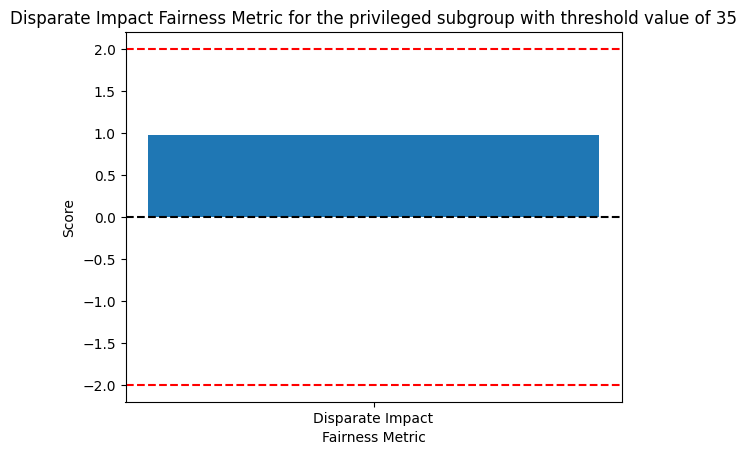

In [214]:
# Graph the Disparate Impact fairness metric for the privileged subgroup (with threshold value of 35)
fig, ax = plt.subplots()
ax.axhline(y=0, color='k', linestyle='--')
ax.axhline(y=2.0, color='r', linestyle='--')
ax.axhline(y=-2.0, color='r', linestyle='--')
ax.set_xlabel('Fairness Metric')
ax.set_ylabel('Score')
ax.set_title('Disparate Impact Fairness Metric for the privileged subgroup with threshold value of 35')
ax.bar('Disparate Impact', disparate_impact3)
plt.show()


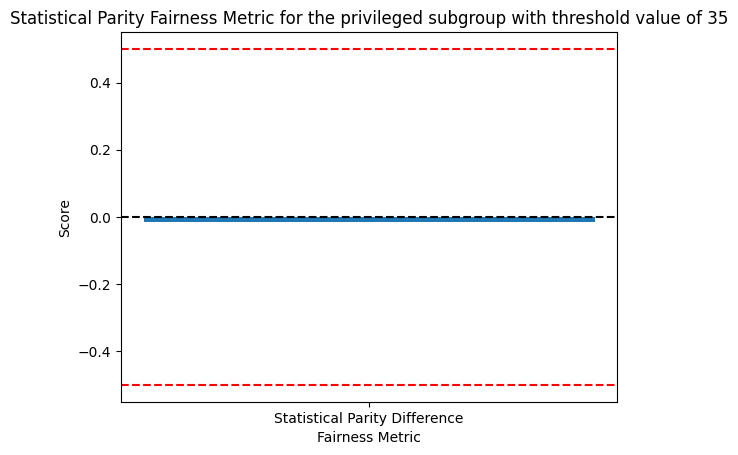

In [215]:
#Compute the statistical parity difference fairness metric for the privileged subgroup (with threshold value of 35)

import pandas as pd
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
import matplotlib.pyplot as plt


# Create a StandardDataset object from the training set dataframe
dataset3 = StandardDataset(s1, 
                          label_name='original_default', 
                          favorable_classes=[0], 
                          protected_attribute_names=['priv2'], 
                          privileged_classes=[[0]])

# Compute the statistical parity difference fairness metric from the StandardDataset object that was created
binary_metric3 = BinaryLabelDatasetMetric(dataset3, 
                                          unprivileged_groups=[{"priv2": 0}], 
                                          privileged_groups=[{"priv2": 1}])

# Calculate the statistical parity difference fairness metric score
statistical_parity_difference3 = binary_metric3.statistical_parity_difference()

# Graph the statistical parity difference fairness metric for the privileged subgroup (with threshold value of 35)
fig, ax = plt.subplots()
ax.axhline(y=0, color='k', linestyle='--')
ax.axhline(y=0.5, color='r', linestyle='--')
ax.axhline(y=-0.5, color='r', linestyle='--')
ax.set_xlabel('Fairness Metric')
ax.set_ylabel('Score')
ax.set_title('Statistical Parity Fairness Metric for the privileged subgroup with threshold value of 35')
ax.bar('Statistical Parity Difference', statistical_parity_difference3)
plt.show()



In [216]:
# Print the value of the statistical parity difference fairness metric for the privileged subgroup (with threshold value of 35)
print("The statistical parity difference metric value is:", statistical_parity_difference3)


The statistical parity difference metric value is: -0.0154861309875165
